# 2D - Random Walk

The goal of this notebook is to explore the stochastic process known as Random Walk, in 2 dimensions.

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

Our random walk will be in 2 dimensions, with movements only in the $x$ and $y$ axes. We will keep track of 3 informations: 

- The $x$ axis movement;
- The $y$ axis movement;
- The distance from the origin, i.e., $d=\sqrt{x^2+y^2}$.

We stablished that the number 1 is a movement up North, 2 is down South, 3 is to East and 4 is to the West. Creating our random walk function: 

In [2]:
def rw(n=1000):
    x = [0]
    y = [0]
    
    for i in range(n):
        move = rd.randint(1,4)
        
        if move == 1:
            x.append(0)
            y.append(1)
            
        elif move == 2:
            x.append(0)
            y.append(-1)
            
        elif move == 3:
            x.append(1)
            y.append(0)
            
        elif move == 4:
            x.append(-1)
            y.append(0)
    
    distance = [np.sqrt(sum(x[0 : i+1])**2 + sum(y[0 : i+1])**2) for i in range(1001)]
        
    return x, y, distance

Let us plot some of the information we have obtained with 1000 steps:

In [3]:
x, y, d = rw()

First, we plot the distance travelled along the axes. We expect the average value of these distances to be equal to zero, as the movements in each axis is independent from each other.

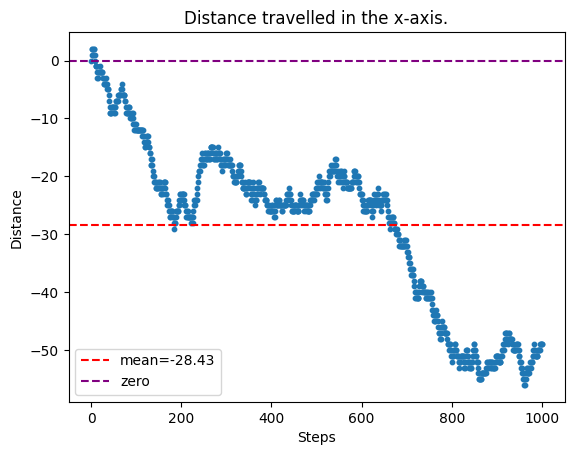

In [4]:
steps = [i for i in range(1001)]
x_dist = [sum(x[0 : i+1]) for i in range(1001)]

plt.scatter(steps, x_dist, s=10.0)
plt.axhline(np.mean(x_dist), linestyle='--', color='red', label=f'mean={np.mean(x_dist):.2f}')
plt.axhline(0, linestyle='--', color='purple', label='zero')
plt.title('Distance travelled in the x-axis.')
plt.ylabel('Distance')
plt.xlabel('Steps')
plt.legend()
plt.show()

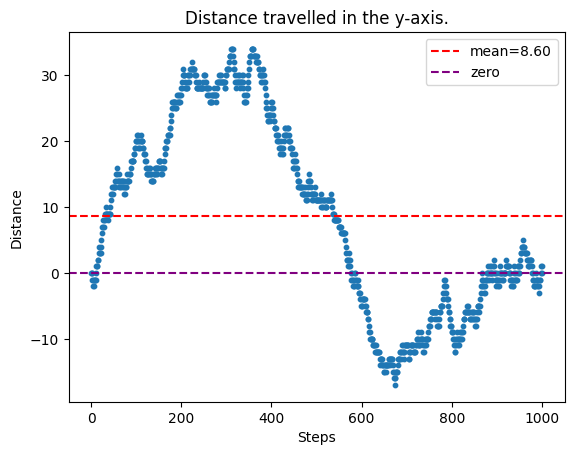

In [5]:
y_dist = [sum(y[0 : i+1]) for i in range(1001)]

plt.scatter(steps, y_dist, s=10.0)
plt.axhline(np.mean(y_dist), linestyle='--', color='red', label=f'mean={np.mean(y_dist):.2f}')
plt.axhline(0, linestyle='--', color='purple', label='zero')
plt.title('Distance travelled in the y-axis.')
plt.ylabel('Distance')
plt.xlabel('Steps')
plt.legend()
plt.show()

Next, we plot the Euclidean distance from the origin. As the distance involves squaring the $x$ and $y$ distances squared, the mean distance should not be zero.

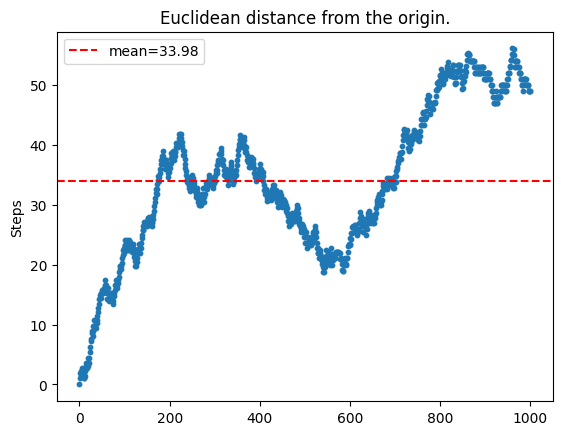

In [6]:
plt.scatter(steps, d, s=10.0)
plt.axhline(np.mean(d), linestyle='--', color='red', label=f'mean={np.mean(d):.2f}')
plt.title('Euclidean distance from the origin.')
plt.ylabel('Distance')
plt.ylabel('Steps')
plt.legend()
plt.show()

We can show the overall movement done by the simulation in more detail.

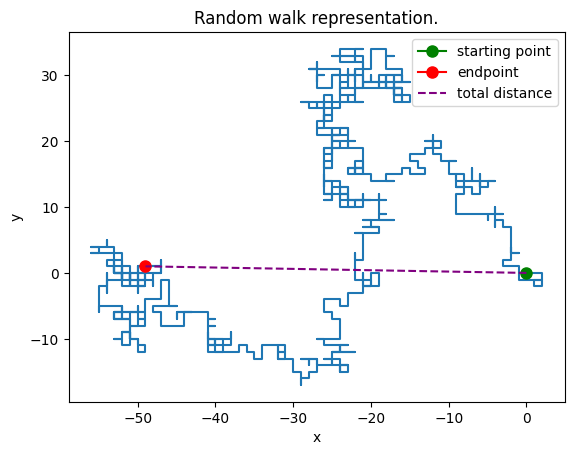

In [7]:
plt.plot(x_dist, y_dist)
plt.plot(0, 0, marker="o", markersize=8, color="green", label='starting point')
plt.plot(x_dist[1000], y_dist[1000], marker="o", markersize=8, color="red", label='endpoint')
plt.plot([0, x_dist[1000]], [0, y_dist[1000]], linestyle='--', color='purple', label='total distance')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random walk representation.')
plt.show()

### Statistical Analysis

To get a better result about the average values from the $x$ and $y$ axis distances, and the total Euclidean distance, we will simulate 200 random walks, and keep track of the average values obtained in the simulations.

In [8]:
def experiment(k=200, n=1000):
    x_mean = []
    y_mean = []
    d_mean = []
    
    for _ in range(n):
        x, y, d = rw()
        x_mean.append(sum(x))
        y_mean.append(sum(y))
        d_mean.append(d[-1])
    
    return x_mean, y_mean, d_mean

In [9]:
x_mean, y_mean, d_mean = experiment()

Plotting the results:

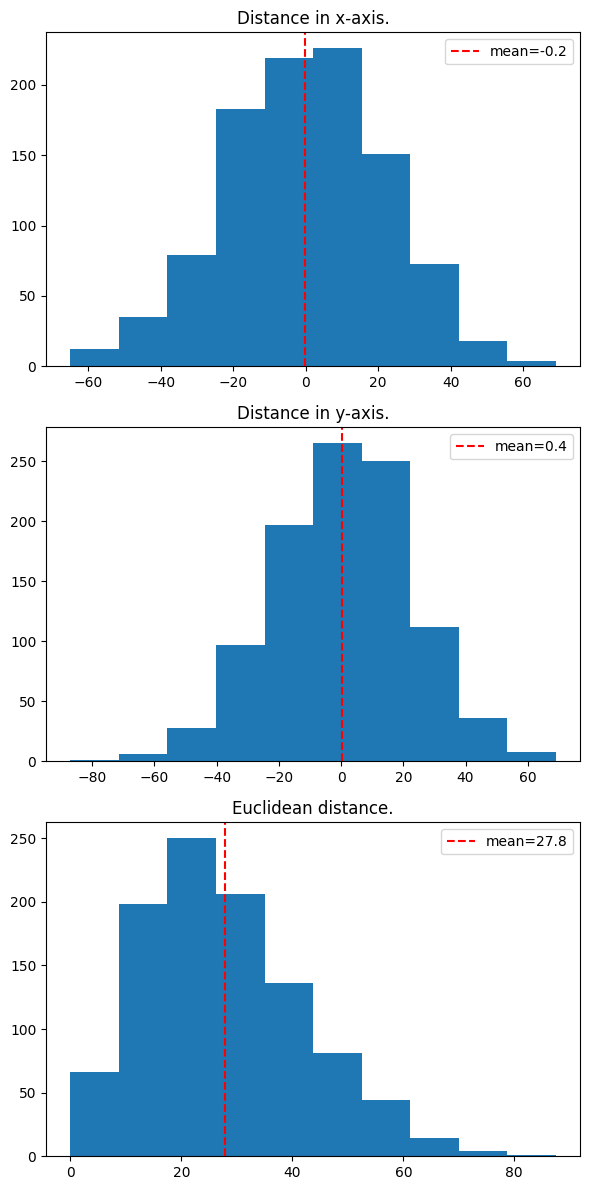

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(6, 12))
ax = axes.ravel()

ax[0].hist(x_mean)
ax[0].set_title("Distance in x-axis.")
ax[0].axvline(np.mean(x_mean), linestyle='--', color='red', label=f'mean={np.mean(x_mean):.1f}')
ax[0].legend()

ax[1].hist(y_mean)
ax[1].set_title("Distance in y-axis.")
ax[1].axvline(np.mean(y_mean), linestyle='--', color='red', label=f'mean={np.mean(y_mean):.1f}')
ax[1].legend()

ax[2].hist(d_mean)
ax[2].set_title("Euclidean distance.")
ax[2].axvline(np.mean(d_mean), linestyle='--', color='red', label=f'mean={np.mean(d_mean):.1f}')
ax[2].legend()

fig.tight_layout()
plt.show()

As expected, the distances in the $x$ and $y$ axis were pratically zero, as their movements are independent. In the Euclidean distance, as we square the distances, the average value should not be zero. In fact, the result is very close to the square root of the number of steps. 

In [11]:
print(f'sqrt of number of steps: {np.sqrt(1000)}')
print()
print(f'average Euclidean distance: {np.mean(d_mean)}')

sqrt of number of steps: 31.622776601683793

average Euclidean distance: 27.788893110711346
